In [1]:
import pandas as pd

# Spam Filtering

# 1. Data

In [2]:
df = pd.read_csv('./smsspamcollection/SMSSpamCollection', delimiter='\t', header=None)

In [3]:
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print("Number of spam messages: %s" % df[df[0] == 'spam'][0].count())
print("Number of spam messages: %s" % df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of spam messages: 4825


# 2. Logistic regression

In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [6]:
X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

for i, prediction in enumerate(predictions[:5]):
    print("Predicted: %s, message: %s" % (prediction, X_test_raw[i]))

Predicted: spam, message: You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p£3.99
Predicted: spam, message: Wanna get laid 2nite? Want real Dogging locations sent direct to ur mobile? Join the UK's largest Dogging Network. Txt PARK to 69696 now! Nyt. ec2a. 3lp £1.50/msg
Predicted: ham, message: Good day to You too.Pray for me.Remove the teeth as its painful maintaining other stuff.
Predicted: ham, message: Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.
Predicted: ham, message: Cheers for the message Zogtorius. Ive been staring at my phone for an age deciding whether to text or not.


# 3. Evaluation

### Confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 1]
 [2 3]]


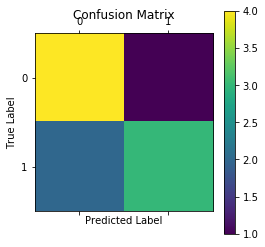

In [8]:
plt.matshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

### 정확도 - Accuracy

In [38]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('./smsspamcollection/SMSSpamCollection', delimiter='\t', header=None)

In [40]:
df.columns = ['label', 'message']

In [51]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Accuracy: %s" %scores)
print("Mean accuracy: %s" %np.mean(scores))

Accuracy: [0.95095694 0.9569378  0.96052632 0.95933014 0.95329341]
Mean accuracy: 0.9562089218691803


### 정밀도 - Precision 
### 재현율 - Recall

In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [53]:
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print("Precision: %f" % np.mean(precisions))
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print("Recall: %f" % np.mean(recalls))

Precision: 0.989974
Recall: 0.685965


### F1 Score

In [54]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print("F1 Score: %s" % np.mean(f1s))

F1 Score: 0.81008647208909


### ROC Curve

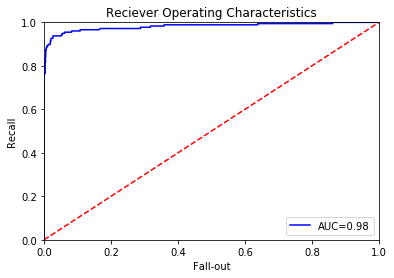

In [55]:
predictions = classifier.predict_proba(X_test)
false_positive_ratio, recall, thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(false_positive_ratio, recall)
plt.title("Reciever Operating Characteristics")
plt.plot(false_positive_ratio, recall, 'b', label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel("Fall-out")
plt.show()

## 4. Grid Search

See Chapter6. GridSearch - Binary

# 3. Multi Class Classification

# Rotten Tomatos

In [57]:
import pandas as pd
df = pd.read_csv('./sentimentAnalysis/train.tsv', header=0, delimiter='\t')
print(df.count())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [58]:
print(df.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [61]:
print(df[['Sentiment']].describe())

           Sentiment
count  156060.000000
mean        2.063578
std         0.893832
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000


In [62]:
print(df['Sentiment'].value_counts())

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [63]:
print(df['Sentiment'].value_counts() / df['Sentiment'].count())

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64


See CHAPTER 6. GridSearch - Multiclass

In [65]:
df['Sentiment'].as_matrix()

/Users/sailyourlife/anaconda3/envs/scikit-learn/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([1, 2, 2, ..., 3, 2, 2])

See Chapter 6. GridSearch - Multiclass

# 4. Multi-Label Classification

1) 교집합에 대해서 새로운 Label을 만든다.
2) 각 레이블에 대해서 분류를 하고 합친다.

### Hamming Loss - 만점이 0 이다.

In [68]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(hamming_loss(
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ]),
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ])
))

0.0


In [69]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(hamming_loss(
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ]),
    np.array([
        [1.0, 1.0],
        [1.0, 1.0]
    ])
))

0.25


In [70]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(hamming_loss(
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ]),
    np.array([
        [0.0, 1.0],
        [0.0, 0.0]
    ])
))

0.5


### Jaccard Similarity

In [71]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(jaccard_similarity_score(
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ]),
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ])
))

1.0


In [72]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(jaccard_similarity_score(
    np.array([
        [1.0, 1.0],
        [1.0, 1.0]
    ]),
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ])
))

0.75


In [73]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(jaccard_similarity_score(
    np.array([
        [1.0, 0.0],
        [1.0, 1.0]
    ]),
    np.array([
        [0.0, 1.0],
        [1.0, 1.0]
    ])
))

0.5
